Presentation on Hepatitis Survival Project https://drive.google.com/file/d/1Rg21aeDqzii0vxsPCJ7nZXkXvTz5Dhsy/view?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#FILE PATH
df=pd.read_csv('/content/drive/MyDrive/UNP/Dataset/Classification/Hepatitis (1).csv')# it is used to call a dataframe  (dataframe is simliar as excel and sql it can gives us data in a tabled manner)
df.head(2)

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1,85,18,4,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,?,1


Added column names in previous try

In [ ]:
'''column_names = ['Class','AGE',
     'SEX',
     'STEROID',
      'ANTIVIRALS',
      'FATIGUE',
      'MALAISE',
      'ANOREXIA',
      'LIVER BIG',
     'LIVER FIRM',
     'SPLEEN PALPABLE',
     'SPIDERS',
     'ASCITES',
     'VARICES',
     'BILIRUBIN',
      'ALK PHOSPHATE',
    'SGOT',
    'ALBUMIN',
    'PROTIME',
    'HISTOLOGY']


with open("'/content/drive/MyDrive/Batman/Classification UNP (Live Or Die)/Hepatitis.csv", mode='r+', newline='') as csv_file:
    reader = csv.reader(csv_file)
    writer = csv.writer(csv_file)'''




'column_names = [\'Class\',\'AGE\',\n     \'SEX\',\n     \'STEROID\',\n      \'ANTIVIRALS\',\n      \'FATIGUE\',\n      \'MALAISE\',\n      \'ANOREXIA\',\n      \'LIVER BIG\',\n     \'LIVER FIRM\',\n     \'SPLEEN PALPABLE\',\n     \'SPIDERS\',\n     \'ASCITES\',\n     \'VARICES\',\n     \'BILIRUBIN\',\n      \'ALK PHOSPHATE\',\n    \'SGOT\',\n    \'ALBUMIN\',\n    \'PROTIME\',\n    \'HISTOLOGY\']\n\n\nwith open("\'/content/drive/MyDrive/Batman/Classification UNP (Live Or Die)/Hepatitis.csv", mode=\'r+\', newline=\'\') as csv_file:\n    reader = csv.reader(csv_file)\n    writer = csv.writer(csv_file)'

**DATA PRE PROCESSING**

In [ ]:
df.shape


(155, 20)

In [ ]:
df.isna().sum() # we have missing values but they are marke as ? in the dataset

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/UNP/Dataset/Classification/Hepatitis (1).csv',na_values='?')
#mentioning that the '?' values are missing values in the dataset
df.isnull().sum()

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER BIG          10
LIVER FIRM         11
SPLEEN PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            67
HISTOLOGY           0
dtype: int64

In [ ]:
df

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,2,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [ ]:
df1=df.dropna(how='all')#dropping row if entire row has null value
df1

df['ALK PHOSPHATE']=df['ALK PHOSPHATE'].interpolate()
df['BILIRUBIN']=df['BILIRUBIN'].interpolate()
df['SGOT']=df['SGOT'].interpolate()
df['PROTIME']=df['PROTIME'].interpolate()
df['ALBUMIN']=df['ALBUMIN'].interpolate() #filling missing values by using interpolation function
df

#df.PROTIME.count()'''

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.000000,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,70.5,200.0,4.0,77.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,123.0,242.0,3.3,50.000000,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,49.333333,2
152,2,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,48.666667,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.000000,2


In [ ]:
columns_to_fill = ['STEROID','FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES','VARICES','HISTOLOGY']


for column in columns_to_fill:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)


In [ ]:
df

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,2.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.000000,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,70.5,200.0,4.0,77.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,123.0,242.0,3.3,50.000000,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,49.333333,2
152,2,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,48.666667,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.000000,2


In [ ]:
df.isna().sum()

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            3
HISTOLOGY          0
dtype: int64

In [ ]:
df.nunique()

Class                2
AGE                 49
SEX                  2
STEROID              2
ANTIVIRALS           2
FATIGUE              2
MALAISE              2
ANOREXIA             2
LIVER BIG            2
LIVER FIRM           2
SPLEEN PALPABLE      2
SPIDERS              2
ASCITES              2
VARICES              2
BILIRUBIN           38
ALK PHOSPHATE      106
SGOT                88
ALBUMIN             38
PROTIME             90
HISTOLOGY            2
dtype: int64

In [ ]:
#REPLACING ALL 2 VALUES WITH 0S
cols=['Class','SEX','STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES','VARICES']
df=df.replace({'Class':{2:0},'SEX':{2:0},'STEROID':{2:0},'ANTIVIRALS':{2:0},'FATIGUE':{2:0},'MALAISE':{2:0},'ANOREXIA':{2:0},'LIVER BIG':{2:0},
               'LIVER FIRM':{2:0},'SPLEEN PALPABLE':{2:0},'SPIDERS':{2:0},'ASCITES':{2:0},'VARICES':{2:0}})
df

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,0,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,85.0,18.0,4.0,NaN,1
1,0,50,1,1.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.9,135.0,42.0,3.5,NaN,1
2,0,78,1,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,96.0,32.0,4.0,NaN,1
3,0,31,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,46.0,52.0,4.0,80.000000,1
4,0,34,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,70.5,200.0,4.0,77.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,0.0,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,7.6,123.0,242.0,3.3,50.000000,2
151,0,44,1,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.9,126.0,142.0,4.3,49.333333,2
152,0,61,1,1.0,0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.8,75.0,20.0,4.1,48.666667,2
153,0,53,0,1.0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.5,81.0,19.0,4.1,48.000000,2


In [ ]:
df.corr()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
Class,1.000000,0.219647,0.173051,0.137413,-0.130196,0.306049,0.339530,0.133638,-0.093665,0.020057,0.234261,0.389137,0.469334,0.362385,0.443038,0.165006,0.066599,-0.430275,-0.315698,0.337856
AGE,0.219647,1.000000,-0.008126,0.090466,0.013100,0.278701,0.117876,-0.088317,0.089629,0.092001,0.061277,0.156545,0.055314,0.039229,0.146849,0.026431,0.080571,-0.235643,-0.165307,0.170780
SEX,0.173051,-0.008126,1.000000,-0.048985,-0.089249,-0.070059,-0.030523,0.015886,-0.081830,-0.078642,-0.048478,-0.033192,0.130587,0.056792,0.058075,-0.065793,0.013502,-0.018044,-0.085486,0.137450
STEROID,0.137413,0.090466,-0.048985,1.000000,0.043961,0.175451,0.240139,0.073644,0.201478,0.068376,0.074816,0.027290,-0.031046,-0.073548,0.067771,0.074484,0.038292,-0.196373,-0.084118,0.095367
ANTIVIRALS,-0.130196,0.013100,-0.089249,0.043961,1.000000,-0.061339,-0.016251,-0.042072,0.054746,0.099213,-0.164548,-0.147909,-0.164747,-0.155148,-0.172042,-0.206094,-0.102433,0.159396,0.059769,-0.209242
FATIGUE,0.306049,0.278701,-0.070059,0.175451,-0.061339,1.000000,0.589030,0.372957,0.099759,0.247505,0.186846,0.367948,0.281439,0.180511,0.276139,0.142477,0.197290,-0.295112,-0.167431,0.146579
MALAISE,0.339530,0.117876,-0.030523,0.240139,-0.016251,0.589030,1.000000,0.600545,0.041697,0.091832,0.006470,0.307173,0.320228,0.161422,0.292090,0.210123,0.207213,-0.270714,-0.137545,0.144667
ANOREXIA,0.133638,-0.088317,0.015886,0.073644,-0.042072,0.372957,0.600545,1.000000,0.079685,0.052781,0.032536,0.287366,0.184053,0.163378,0.283735,0.150018,0.231054,-0.158351,-0.046156,0.081623
LIVER BIG,-0.093665,0.089629,-0.081830,0.201478,0.054746,0.099759,0.041697,0.079685,1.000000,0.479779,0.095959,0.215566,-0.116465,-0.049453,0.017248,0.130287,-0.044984,0.056400,0.069897,0.060262
LIVER FIRM,0.020057,0.092001,-0.078642,0.068376,0.099213,0.247505,0.091832,0.052781,0.479779,1.000000,0.180607,0.345553,0.010196,0.208047,0.053983,0.300199,0.102148,-0.172712,-0.039464,0.157118


In [ ]:
df.corr()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
Class,1.000000,0.219647,0.173051,0.137413,-0.130196,0.306049,0.339530,0.133638,-0.093665,0.020057,0.234261,0.389137,0.469334,0.362385,0.443038,0.165006,0.066599,-0.430275,-0.315698,0.337856
AGE,0.219647,1.000000,-0.008126,0.090466,0.013100,0.278701,0.117876,-0.088317,0.089629,0.092001,0.061277,0.156545,0.055314,0.039229,0.146849,0.026431,0.080571,-0.235643,-0.165307,0.170780
SEX,0.173051,-0.008126,1.000000,-0.048985,-0.089249,-0.070059,-0.030523,0.015886,-0.081830,-0.078642,-0.048478,-0.033192,0.130587,0.056792,0.058075,-0.065793,0.013502,-0.018044,-0.085486,0.137450
STEROID,0.137413,0.090466,-0.048985,1.000000,0.043961,0.175451,0.240139,0.073644,0.201478,0.068376,0.074816,0.027290,-0.031046,-0.073548,0.067771,0.074484,0.038292,-0.196373,-0.084118,0.095367
ANTIVIRALS,-0.130196,0.013100,-0.089249,0.043961,1.000000,-0.061339,-0.016251,-0.042072,0.054746,0.099213,-0.164548,-0.147909,-0.164747,-0.155148,-0.172042,-0.206094,-0.102433,0.159396,0.059769,-0.209242
FATIGUE,0.306049,0.278701,-0.070059,0.175451,-0.061339,1.000000,0.589030,0.372957,0.099759,0.247505,0.186846,0.367948,0.281439,0.180511,0.276139,0.142477,0.197290,-0.295112,-0.167431,0.146579
MALAISE,0.339530,0.117876,-0.030523,0.240139,-0.016251,0.589030,1.000000,0.600545,0.041697,0.091832,0.006470,0.307173,0.320228,0.161422,0.292090,0.210123,0.207213,-0.270714,-0.137545,0.144667
ANOREXIA,0.133638,-0.088317,0.015886,0.073644,-0.042072,0.372957,0.600545,1.000000,0.079685,0.052781,0.032536,0.287366,0.184053,0.163378,0.283735,0.150018,0.231054,-0.158351,-0.046156,0.081623
LIVER BIG,-0.093665,0.089629,-0.081830,0.201478,0.054746,0.099759,0.041697,0.079685,1.000000,0.479779,0.095959,0.215566,-0.116465,-0.049453,0.017248,0.130287,-0.044984,0.056400,0.069897,0.060262
LIVER FIRM,0.020057,0.092001,-0.078642,0.068376,0.099213,0.247505,0.091832,0.052781,0.479779,1.000000,0.180607,0.345553,0.010196,0.208047,0.053983,0.300199,0.102148,-0.172712,-0.039464,0.157118


EDA

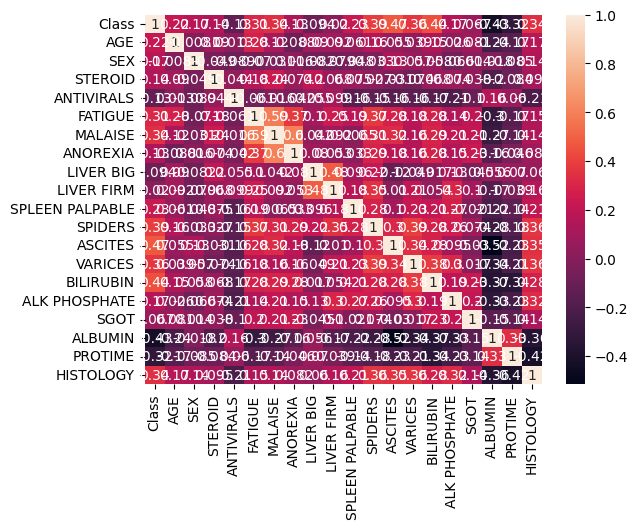

In [ ]:
#HEATMAP FOR CORRELATION
df.corr()

sns.heatmap(df.corr(), annot=True)
#plt.rcParams['figure.figsize']=(5,5)
plt.show()


0 is live (true)
1 is die (false)

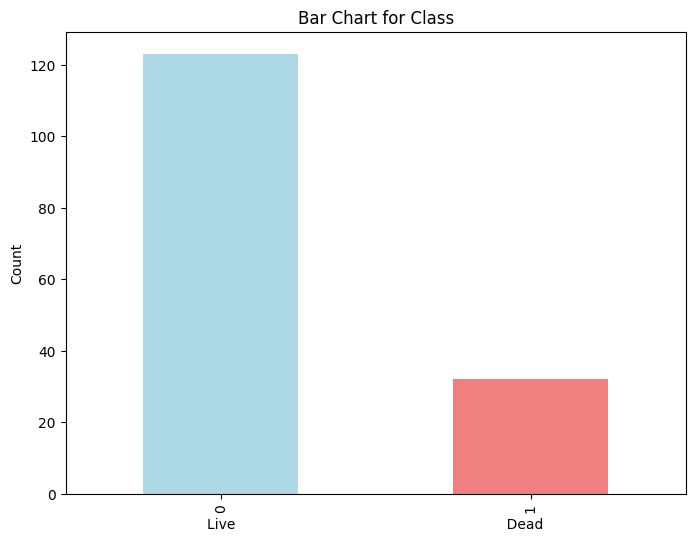

In [ ]:
plt.figure(figsize=(8, 6))
df['Class'].value_counts().plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Bar Chart for Class')
plt.xlabel('Live                                                              Dead')
plt.ylabel('Count')
plt.show()

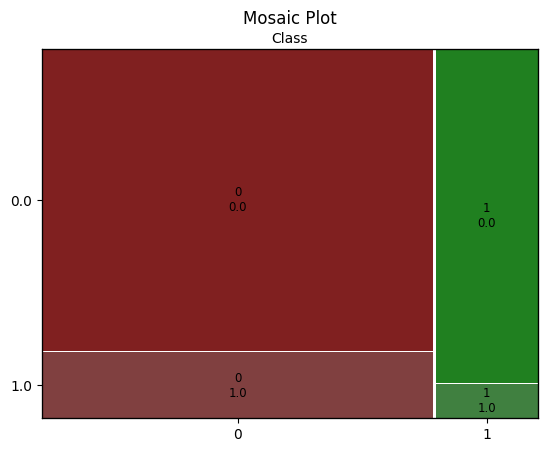

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Sample data


# Create a mosaic plot
mosaic(df, ['Class', 'LIVER BIG'], title='Mosaic Plot')
plt.xlabel('Class')
plt.ylabel('Enlarged Liver')

# Show the plot
plt.show()

In [ ]:
df['LIVER BIG'].count()

155

<ipython-input-177-85a62f41cac9>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='ALBUMIN', data=df, discrete=True, stat='count', multiple='dodge', palette='pastel',kde=True)


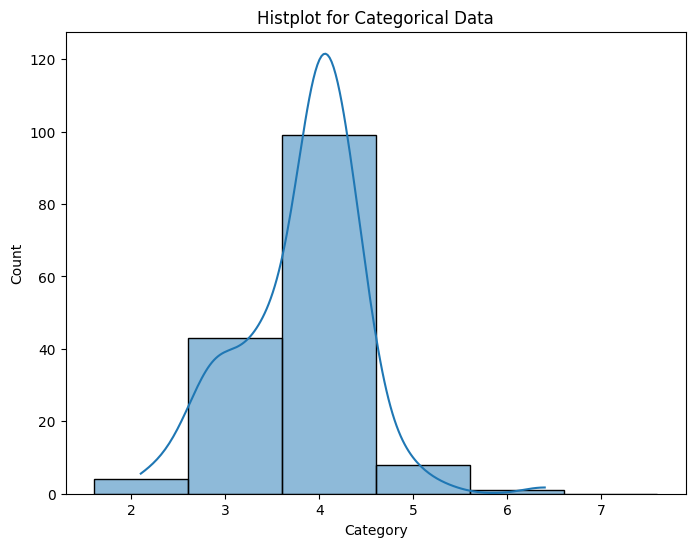

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(x='ALBUMIN', data=df, discrete=True, stat='count', multiple='dodge', palette='pastel',kde=True)
plt.title('Histplot for Categorical Data')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
#df['AGE'] = np.log1p(df['AGE'])

<Axes: xlabel='AGE'>

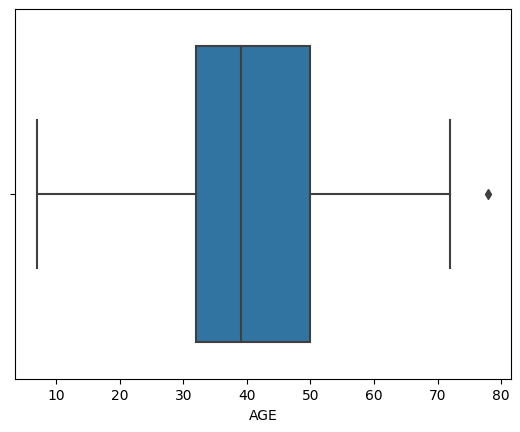

In [ ]:
sns.boxplot(x=df['AGE'])

<ipython-input-180-29043f84fa15>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='AGE', data=df, discrete=True, stat='count', multiple='dodge', palette='pastel',kde=True)


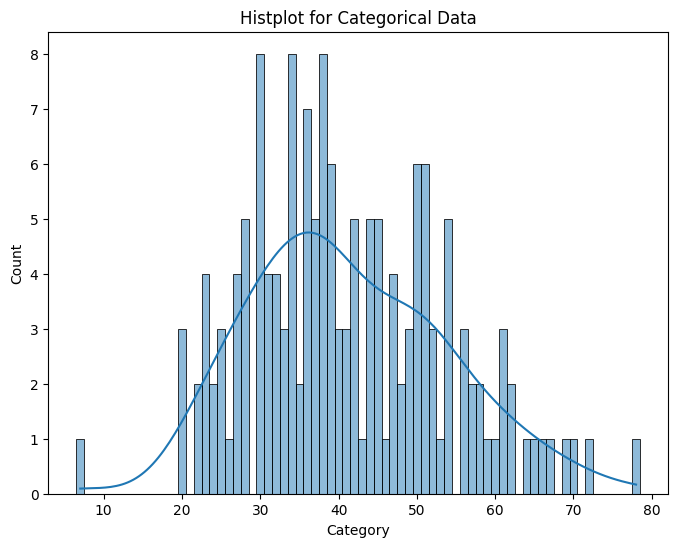

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(x='AGE', data=df, discrete=True, stat='count', multiple='dodge', palette='pastel',kde=True)
plt.title('Histplot for Categorical Data')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
df['AGE']

0      30
1      50
2      78
3      31
4      34
       ..
150    46
151    44
152    61
153    53
154    43
Name: AGE, Length: 155, dtype: int64

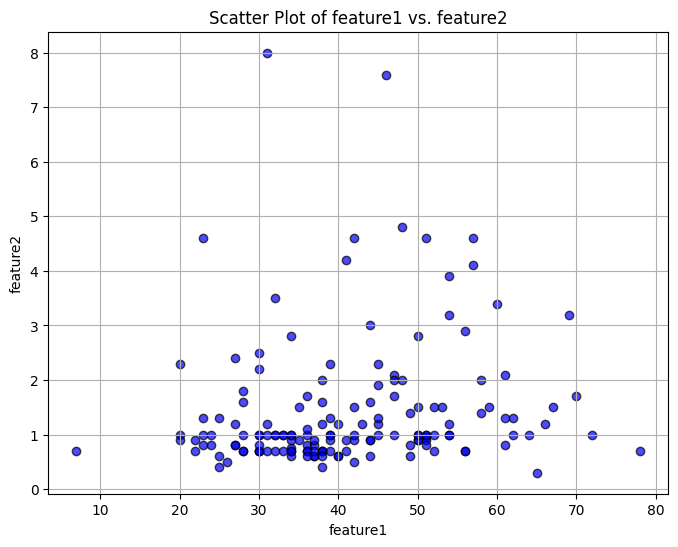

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['AGE'], df['BILIRUBIN'], alpha=0.7, color='blue', edgecolors='black')
plt.title('Scatter Plot of feature1 vs. feature2')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.grid(True)
plt.show()

In [ ]:
df['BILIRUBIN'].describe()


count    155.000000
mean       1.436774
std        1.204578
min        0.300000
25%        0.725000
50%        1.000000
75%        1.500000
max        8.000000
Name: BILIRUBIN, dtype: float64

In [ ]:

df.at[150,'BILIRUBIN']=1.4
df.at[131,'BILIRUBIN']=2.0


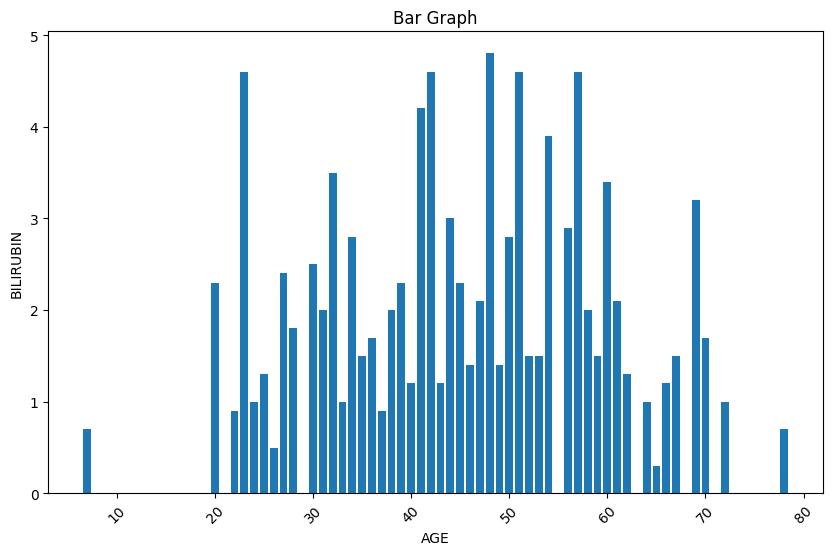

In [ ]:
#BAR GRAPH
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

plt.bar(df['AGE'], df['BILIRUBIN'])

plt.xlabel('AGE')
plt.ylabel('BILIRUBIN')
plt.title('Bar Graph')

plt.xticks(rotation=45)

plt.show()


Outliers

<Axes: >

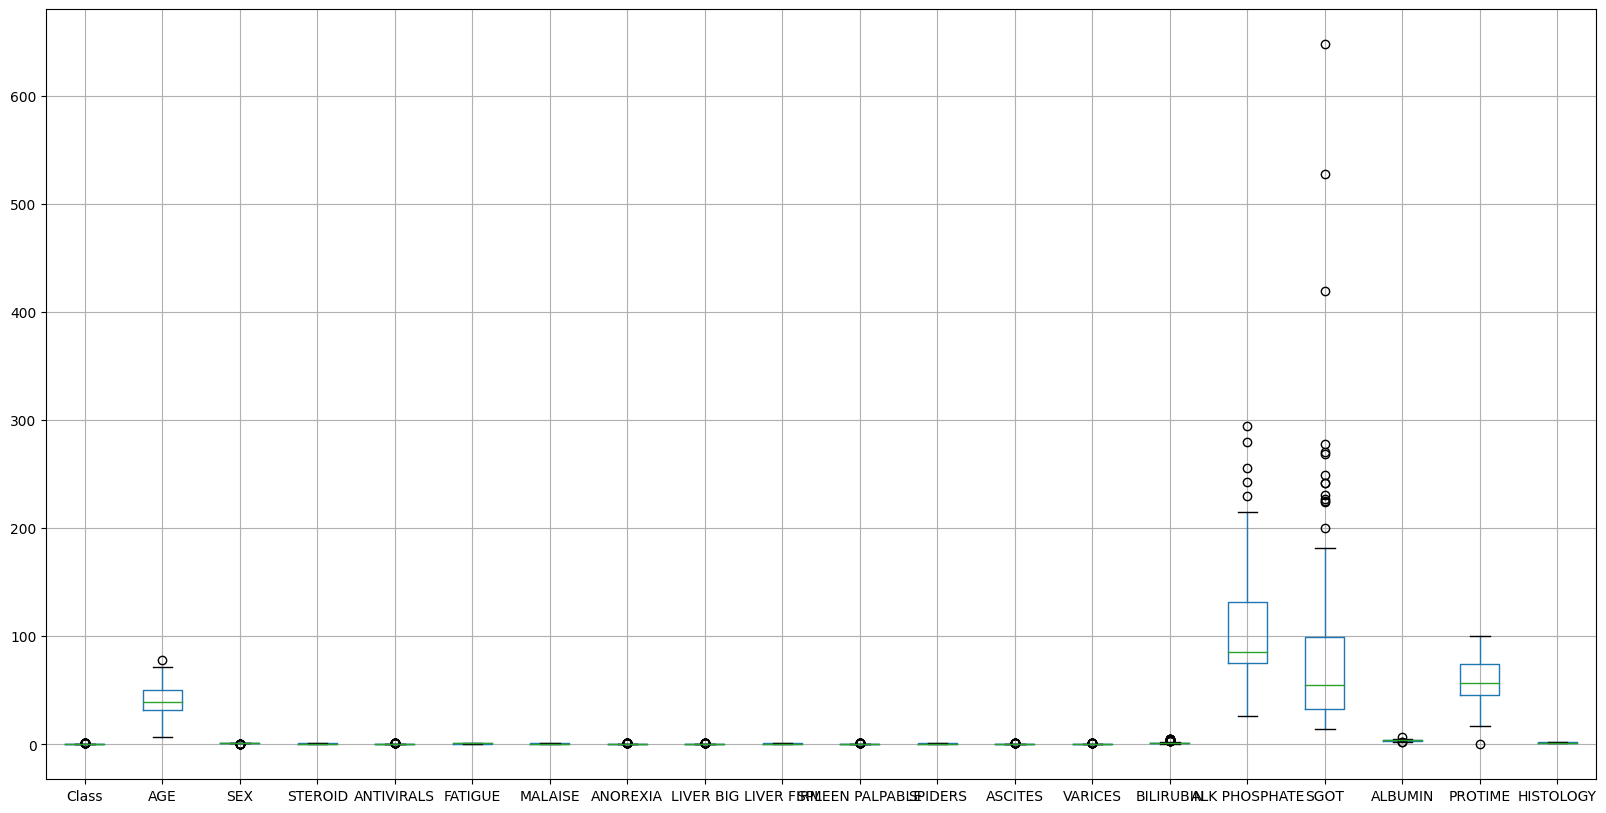

In [ ]:
#BOXPLOT
df.boxplot(figsize=(20,10))

In [ ]:
df['SGOT'].describe()

count    155.000000
mean      84.832258
std       88.728806
min       14.000000
25%       32.500000
50%       55.000000
75%       99.000000
max      648.000000
Name: SGOT, dtype: float64

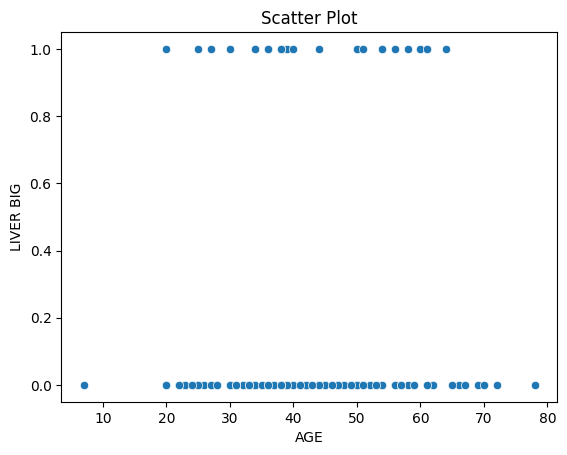

In [ ]:
sns.scatterplot(x='AGE', y='LIVER BIG', data=df)
plt.title('Scatter Plot')
plt.show()

Bar graph for relation between age and large liver

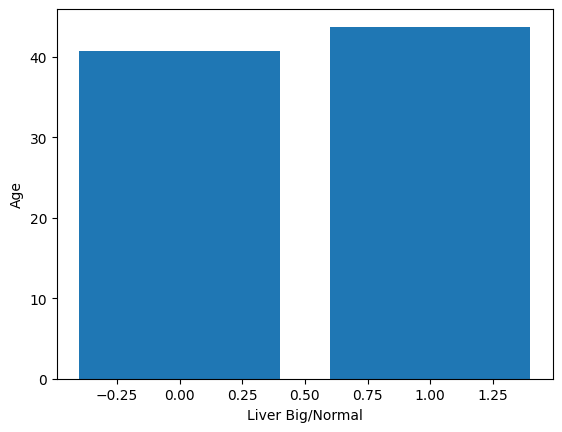

Average for 'ENLARGED LIVEr': 43.76
Average for 'NOT ENLARGED LIVER': 40.707692307692305
Count of Enlarged Liver : 25
Count of Not enlarged Liver: 130


In [ ]:
#RELATION B/W ENLARGED LIVER AND AGE
average_true = df[df["LIVER BIG"] == 1]["AGE"].mean()
average_false = df[df["LIVER BIG"] == 0]["AGE"].mean()


plt.bar([1, 0], [average_true, average_false])
plt.xlabel("Liver Big/Normal")
plt.ylabel("Age")

plt.show()

print(f"Average for 'ENLARGED LIVEr': {average_true}")
print(f"Average for 'NOT ENLARGED LIVER': {average_false}")

#count of enlarged and non enlarged livers
count1=df[df["LIVER BIG"] == 1]["AGE"].count()
count2=df[df["LIVER BIG"] == 0]["AGE"].count()
print(f"Count of Enlarged Liver : {count1}")
print(f"Count of Not enlarged Liver: {count2}")

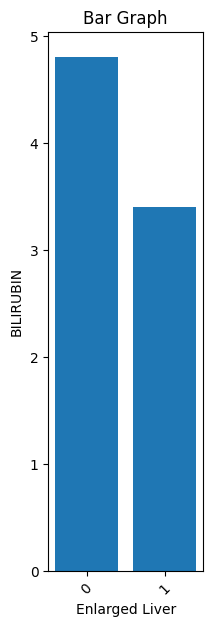

In [ ]:
#RELATION B/W BILURBIN AND LIVER SIZE USING BAR GRAPH
plt.figure(figsize=(2,7))

plt.bar( df['LIVER BIG'],df['BILIRUBIN'])

plt.xlabel('Enlarged Liver')
plt.ylabel('BILIRUBIN')
plt.title('Bar Graph')

plt.xticks(rotation=45)

plt.show()

In [ ]:
df['LIVER BIG'].describe()

count    155.000000
mean       0.161290
std        0.368991
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: LIVER BIG, dtype: float64

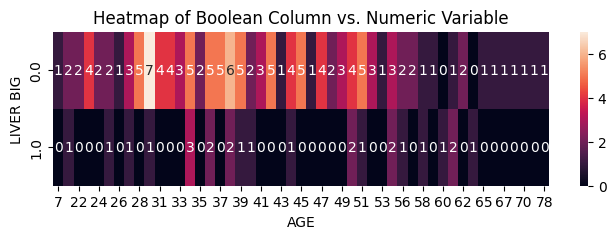

In [ ]:
cross_tab = pd.crosstab(df['LIVER BIG'], df['AGE'])

# Create a heatmap to visualize the relationship B/W
plt.figure(figsize=(8, 2))
sns.heatmap(cross_tab, annot=True)
plt.xlabel('AGE')
plt.ylabel('LIVER BIG')
plt.title('Heatmap of Boolean Column vs. Numeric Variable')
plt.show()

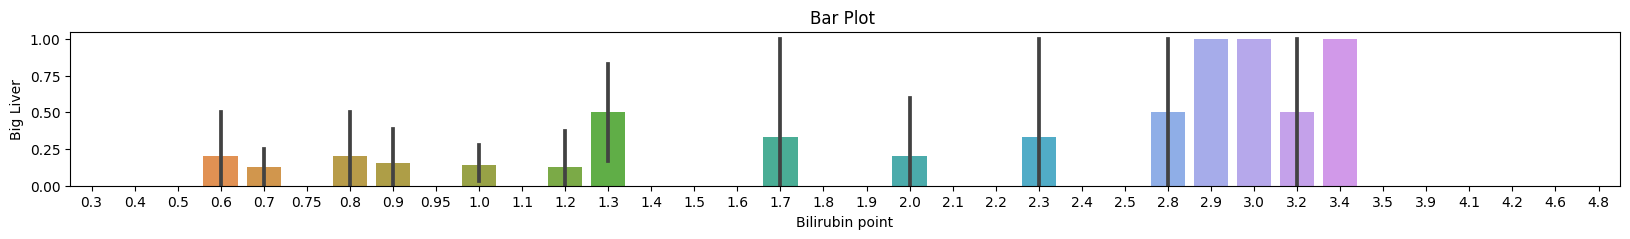

In [ ]:

plt.figure(figsize=(20, 2))
sns.barplot(y='LIVER BIG', x='BILIRUBIN', data=df)


plt.xlabel('Bilirubin point')
plt.ylabel('Big Liver')
plt.title('Bar Plot ')

# Show the plot
plt.show()

In [ ]:
sns.pairplot(df)
plt.show()

Dropping protime column


In [ ]:
df=df.drop(['PROTIME'],axis=1)

In [ ]:
df.describe()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,0.206452,41.200000,0.896774,0.490323,0.154839,0.651613,0.393548,0.206452,0.161290,0.387097,0.193548,0.329032,0.129032,0.116129,1.358065,105.825806,84.832258,3.822581,1.451613
std,0.406070,12.565878,0.305240,0.501527,0.362923,0.478004,0.490120,0.406070,0.368991,0.488665,0.396360,0.471385,0.336322,0.321418,0.959411,49.078735,88.728806,0.635119,0.499266
min,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,26.000000,14.000000,2.100000,1.000000
25%,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.725000,75.000000,32.500000,3.425000,1.000000
50%,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,85.000000,55.000000,4.000000,1.000000
75%,0.000000,50.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.500000,131.500000,99.000000,4.200000,2.000000
max,1.000000,78.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.800000,295.000000,648.000000,6.400000,2.000000


In [ ]:
df.isna().sum()

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
HISTOLOGY          0
dtype: int64

In [ ]:
transformed_data = np.log1p(df['SGOT'])
df['SGOT']=transformed_data

In [ ]:
df.describe()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,0.206452,41.200000,0.896774,0.490323,0.154839,0.651613,0.393548,0.206452,0.161290,0.387097,0.193548,0.329032,0.129032,0.116129,1.358065,105.825806,4.113689,3.822581,1.451613
std,0.406070,12.565878,0.305240,0.501527,0.362923,0.478004,0.490120,0.406070,0.368991,0.488665,0.396360,0.471385,0.336322,0.321418,0.959411,49.078735,0.786398,0.635119,0.499266
min,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,26.000000,2.708050,2.100000,1.000000
25%,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.725000,75.000000,3.511434,3.425000,1.000000
50%,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,85.000000,4.025352,4.000000,1.000000
75%,0.000000,50.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.500000,131.500000,4.605120,4.200000,2.000000
max,1.000000,78.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.800000,295.000000,6.475433,6.400000,2.000000


DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report


In [ ]:
X=df.drop(['Class'],axis=1)
y=df['Class']#target variable

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

**VIF**

In [ ]:
calc_vif(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [ ]:
clf=DecisionTreeClassifier()#creating decison tree classifier object
clf=clf.fit(X_train,y_train)#training the decison tree on our training dataset
ypred=clf.predict(X_test)#using it to predict on our testing data set

In [ ]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        38
           1       0.25      0.22      0.24         9

    accuracy                           0.72        47
   macro avg       0.54      0.53      0.53        47
weighted avg       0.71      0.72      0.72        47



In [ ]:
a=pd.DataFrame({'Actual':y_test,'Predicted':ypred})
a

,Actual,Predicted
117,0,0
75,0,0
51,0,0
31,1,0
35,1,0
40,0,0
14,0,1
109,1,0
53,0,1
145,0,0


In [ ]:
print('Accuracy',metrics.accuracy_score(y_test,ypred))#here we get 74.1 percent accuracy

Accuracy 0.723404255319149


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model=model.fit(X_train,y_train)
ypred=model.predict(X_test)
ypred
f=pd.DataFrame({'Actual':y_test,'Predicted':ypred})
print(f)
print(metrics.accuracy_score(y_test,ypred))

     Actual  Predicted
117       0          0
75        0          0
51        0          0
31        1          0
35        1          0
40        0          0
14        0          0
109       1          0
53        0          0
145       0          0
149       0          0
78        0          0
92        0          0
90        0          0
89        0          0
5         0          0
123       0          0
16        0          0
19        0          0
29        0          0
56        0          0
142       0          1
138       1          1
99        0          0
93        0          0
69        0          0
94        1          1
42        0          0
122       0          0
44        0          0
105       0          0
151       0          0
66        0          0
33        0          0
153       0          1
59        0          0
127       1          1
131       1          0
147       1          0
125       0          0
58        0          0
28        0          0
124       0

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, ypred))


              precision    recall  f1-score   support

           0       0.86      0.95      0.90        38
           1       0.60      0.33      0.43         9

    accuracy                           0.83        47
   macro avg       0.73      0.64      0.66        47
weighted avg       0.81      0.83      0.81        47



LOGISTIC **REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1=model1.fit(X_train,y_train)

In [ ]:
ypred=model1.predict(X_test)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [ ]:
h=pd.DataFrame({'Actual':y_test,'Predicted':ypred})
h

,Actual,Predicted
117,0,0
75,0,0
51,0,0
31,1,0
35,1,0
40,0,0
14,0,0
109,1,0
53,0,0
145,0,0


In [ ]:
print(metrics.accuracy_score(y_test,ypred))

0.8297872340425532


**NAIVE** **BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
cls=GaussianNB()
cls=cls.fit(X_train,y_train)
ypred=cls.predict(X_test)

In [ ]:
i=pd.DataFrame({'Actual':y_test,'Predicted':ypred})
i

,Actual,Predicted
117,0,1
75,0,0
51,0,0
31,1,1
35,1,1
40,0,0
14,0,0
109,1,1
53,0,0
145,0,1


In [ ]:
print(metrics.accuracy_score(y_test,ypred))

0.6382978723404256


**SVM**

In [ ]:

from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


In [ ]:
i=pd.DataFrame({'Actual':y_test,'Predicted':ypred})
i

,Actual,Predicted
117,0,1
75,0,0
51,0,0
31,1,1
35,1,1
40,0,0
14,0,0
109,1,1
53,0,0
145,0,1


In [ ]:
print(metrics.accuracy_score(y_test,ypred))

0.6382978723404256


**Random** **Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)
ypred=model.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_test,ypred))

0.7659574468085106


XGBOOST

In [ ]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(n_estimators = 1000, learning_rate = 0.05)
xgboost.fit(X_train, y_train, early_stopping_rounds = 5, eval_set = [(X_test, y_test)],verbose = False)
score_xgb = xgboost.score(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [ ]:
ypred=xgboost.predict(X_test)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [ ]:
print(metrics.accuracy_score(y_test,ypred))

0.7659574468085106


ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [ ]:
ypred=adaboost_classifier.predict(X_test)

BAGGING

In [ ]:

from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
base_classifier = DecisionTreeClassifier(random_state=42)
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred = bagging_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Bagging Accuracy: {accuracy}')

Bagging Accuracy: 0.8297872340425532


ANN

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
def build_model():
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Softmax for multi-class classification
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model()
history = model.fit(X_train, y_train, epochs=40, validation_split=0.2, verbose=2)

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


3/3 - 1s - loss: 0.0000e+00 - accuracy: 0.2442 - val_loss: 0.0000e+00 - val_accuracy: 0.4545 - 1s/epoch - 481ms/step
Epoch 2/40


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


3/3 - 0s - loss: 0.0000e+00 - accuracy: 0.3605 - val_loss: 0.0000e+00 - val_accuracy: 0.6818 - 83ms/epoch - 28ms/step
Epoch 3/40
3/3 - 0s - loss: 0.0000e+00 - accuracy: 0.6395 - val_loss: 0.0000e+00 - val_accuracy: 0.8182 - 65ms/epoch - 22ms/step
Epoch 4/40
3/3 - 0s - loss: 0.0000e+00 - accuracy: 0.8023 - val_loss: 0.0000e+00 - val_accuracy: 0.8182 - 64ms/epoch - 21ms/step
Epoch 5/40
3/3 - 0s - loss: 0.0000e+00 - accuracy: 0.7907 - val_loss: 0.0000e+00 - val_accuracy: 0.7727 - 66ms/epoch - 22ms/step
Epoch 6/40
3/3 - 0s - loss: 0.0000e+00 - accuracy: 0.7791 - val_loss: 0.0000e+00 - val_accuracy: 0.7727 - 61ms/epoch - 20ms/step
Epoch 7/40
3/3 - 0s - loss: 0.0000e+00 - accuracy: 0.7907 - val_loss: 0.0000e+00 - val_accuracy: 0.7727 - 45ms/epoch - 15ms/step
Epoch 8/40
3/3 - 0s - loss: 0.0000e+00 - accuracy: 0.7907 - val_loss: 0.0000e+00 - val_accuracy: 0.7727 - 67ms/epoch - 22ms/step
Epoch 9/40
3/3 - 0s - loss: 0.0000e+00 - accuracy: 0.7907 - val_loss: 0.0000e+00 - val_accuracy: 0.7727 - 52

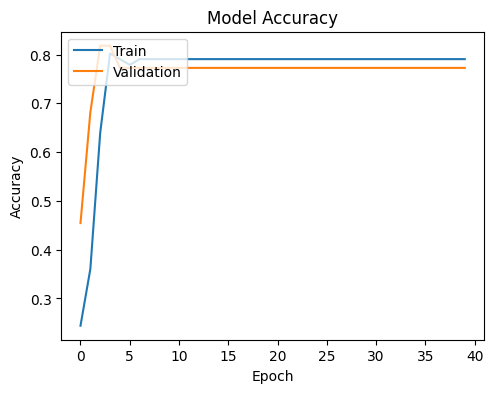

In [ ]:
plt.figure(figsize=(12, 4))

# Plot Training & Validation Accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


2/2 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 0.8085
Test Accuracy: 0.8085106611251831


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

2/2 [==============================] - 0s 7ms/step
Confusion Matrix:
[[38  0]
 [ 9  0]]


ANN WITH DIFFERENT COMBINATIONS

In [ ]:
X=df.drop(['Class'],axis=1)
y=df['Class']

1/1 [==============================] - 0s 108ms/step


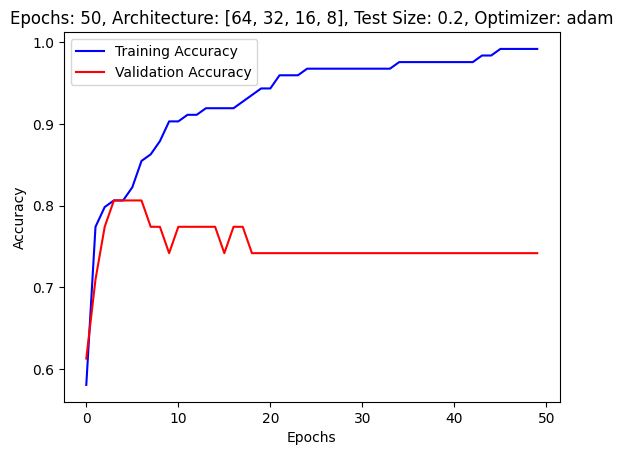

Epochs: 50, Architecture: [64, 32, 16, 8], Test Size: 0.2, Optimizer: adam
Test Loss: 1.1445, Test Accuracy: 0.7419
Confusion Matrix:
[[20  4]
 [ 4  3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        24
           1       0.43      0.43      0.43         7

    accuracy                           0.74        31
   macro avg       0.63      0.63      0.63        31
weighted avg       0.74      0.74      0.74        31



1/1 [==============================] - 0s 74ms/step


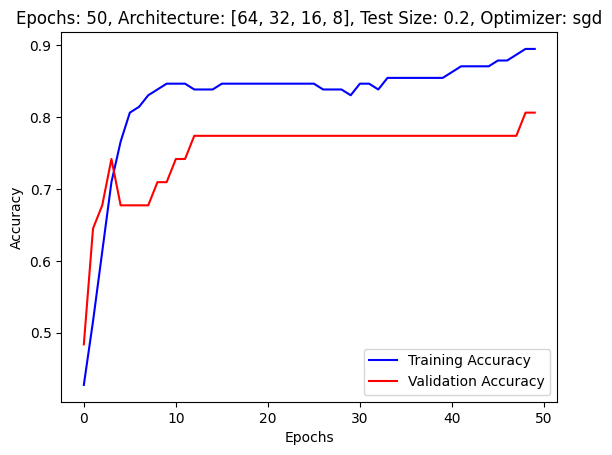

Epochs: 50, Architecture: [64, 32, 16, 8], Test Size: 0.2, Optimizer: sgd
Test Loss: 0.4295, Test Accuracy: 0.8065
Confusion Matrix:
[[24  0]
 [ 6  1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        24
           1       1.00      0.14      0.25         7

    accuracy                           0.81        31
   macro avg       0.90      0.57      0.57        31
weighted avg       0.85      0.81      0.74        31



2/2 [==============================] - 0s 8ms/step


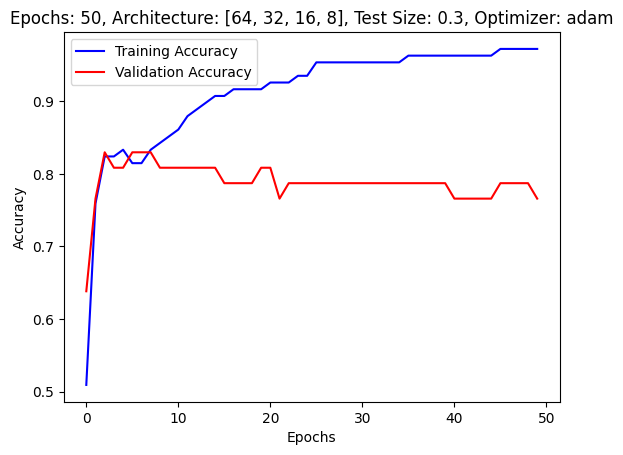

Epochs: 50, Architecture: [64, 32, 16, 8], Test Size: 0.3, Optimizer: adam
Test Loss: 0.6178, Test Accuracy: 0.7660
Confusion Matrix:
[[34  4]
 [ 7  2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        38
           1       0.33      0.22      0.27         9

    accuracy                           0.77        47
   macro avg       0.58      0.56      0.56        47
weighted avg       0.73      0.77      0.75        47

2/2 [==============================] - 0s 6ms/step


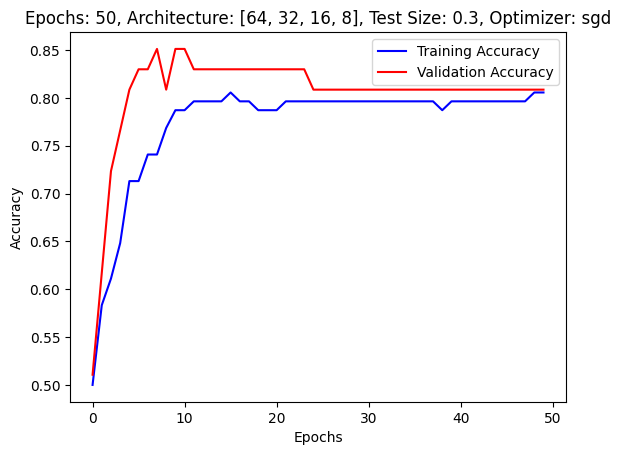

Epochs: 50, Architecture: [64, 32, 16, 8], Test Size: 0.3, Optimizer: sgd
Test Loss: 0.4898, Test Accuracy: 0.8085
Confusion Matrix:
[[38  0]
 [ 9  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        38
           1       0.00      0.00      0.00         9

    accuracy                           0.81        47
   macro avg       0.40      0.50      0.45        47
weighted avg       0.65      0.81      0.72        47



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 72ms/step


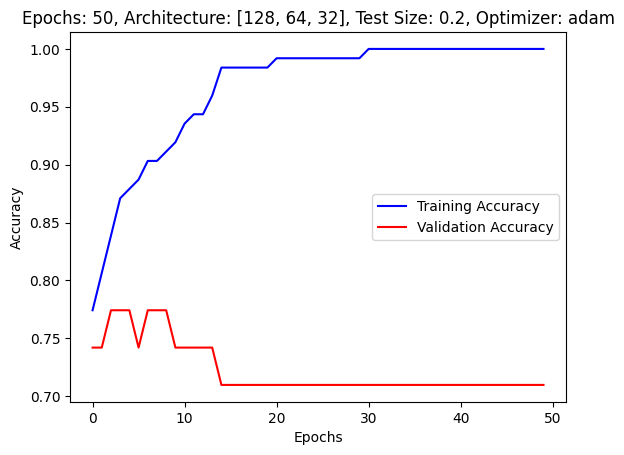

Epochs: 50, Architecture: [128, 64, 32], Test Size: 0.2, Optimizer: adam
Test Loss: 1.1866, Test Accuracy: 0.7097
Confusion Matrix:
[[19  5]
 [ 4  3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        24
           1       0.38      0.43      0.40         7

    accuracy                           0.71        31
   macro avg       0.60      0.61      0.60        31
weighted avg       0.72      0.71      0.72        31

1/1 [==============================] - 0s 74ms/step


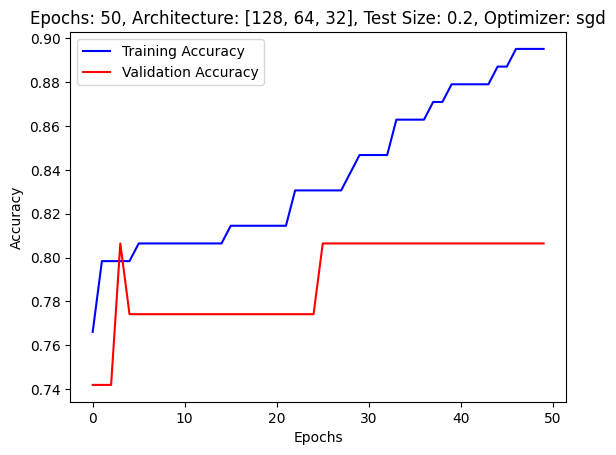

Epochs: 50, Architecture: [128, 64, 32], Test Size: 0.2, Optimizer: sgd
Test Loss: 0.4341, Test Accuracy: 0.8065
Confusion Matrix:
[[24  0]
 [ 6  1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        24
           1       1.00      0.14      0.25         7

    accuracy                           0.81        31
   macro avg       0.90      0.57      0.57        31
weighted avg       0.85      0.81      0.74        31

2/2 [==============================] - 0s 9ms/step


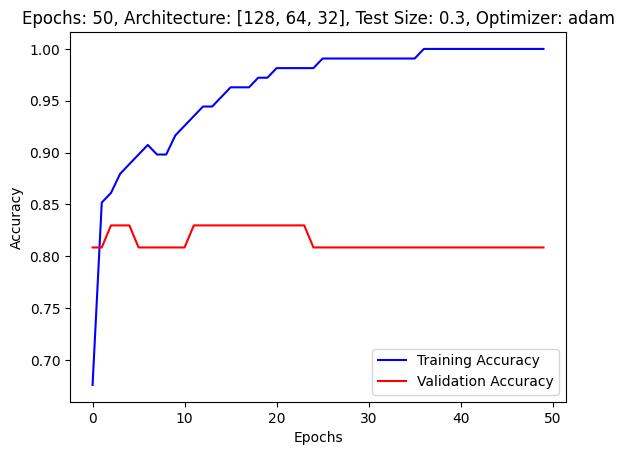

Epochs: 50, Architecture: [128, 64, 32], Test Size: 0.3, Optimizer: adam
Test Loss: 1.0302, Test Accuracy: 0.8085
Confusion Matrix:
[[35  3]
 [ 6  3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89        38
           1       0.50      0.33      0.40         9

    accuracy                           0.81        47
   macro avg       0.68      0.63      0.64        47
weighted avg       0.79      0.81      0.79        47

2/2 [==============================] - 0s 7ms/step


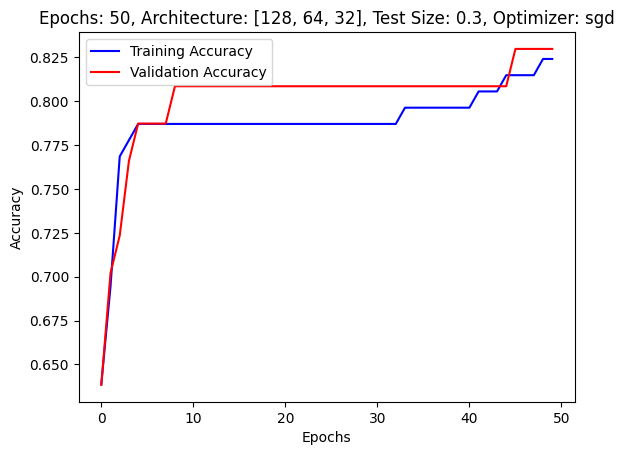

Epochs: 50, Architecture: [128, 64, 32], Test Size: 0.3, Optimizer: sgd
Test Loss: 0.3974, Test Accuracy: 0.8298
Confusion Matrix:
[[38  0]
 [ 8  1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.90        38
           1       1.00      0.11      0.20         9

    accuracy                           0.83        47
   macro avg       0.91      0.56      0.55        47
weighted avg       0.86      0.83      0.77        47

1/1 [==============================] - 0s 82ms/step


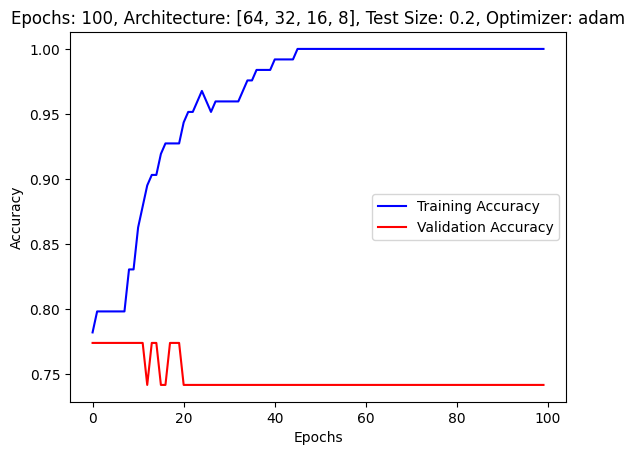

Epochs: 100, Architecture: [64, 32, 16, 8], Test Size: 0.2, Optimizer: adam
Test Loss: 1.6425, Test Accuracy: 0.7419
Confusion Matrix:
[[20  4]
 [ 4  3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        24
           1       0.43      0.43      0.43         7

    accuracy                           0.74        31
   macro avg       0.63      0.63      0.63        31
weighted avg       0.74      0.74      0.74        31

1/1 [==============================] - 0s 85ms/step


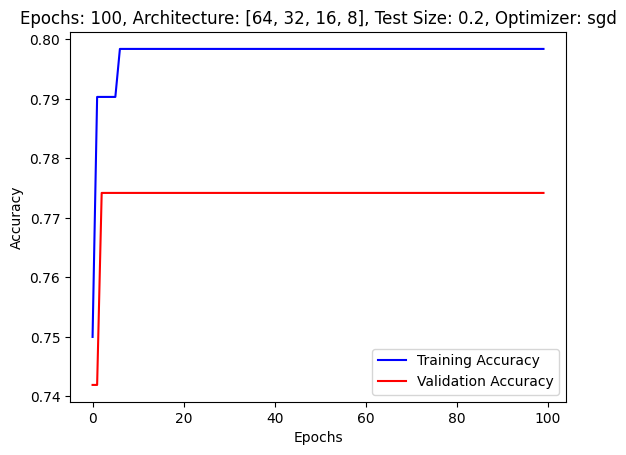

Epochs: 100, Architecture: [64, 32, 16, 8], Test Size: 0.2, Optimizer: sgd
Test Loss: 0.4752, Test Accuracy: 0.7742
Confusion Matrix:
[[24  0]
 [ 7  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        24
           1       0.00      0.00      0.00         7

    accuracy                           0.77        31
   macro avg       0.39      0.50      0.44        31
weighted avg       0.60      0.77      0.68        31



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2/2 [==============================] - 0s 10ms/step


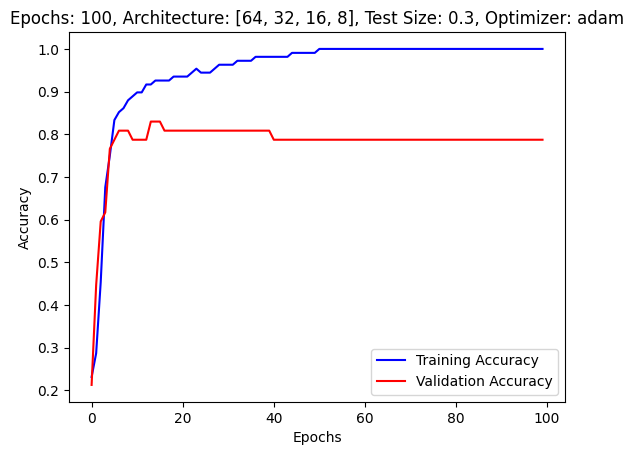

Epochs: 100, Architecture: [64, 32, 16, 8], Test Size: 0.3, Optimizer: adam
Test Loss: 1.2773, Test Accuracy: 0.7872
Confusion Matrix:
[[34  4]
 [ 6  3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        38
           1       0.43      0.33      0.38         9

    accuracy                           0.79        47
   macro avg       0.64      0.61      0.62        47
weighted avg       0.77      0.79      0.78        47

2/2 [==============================] - 0s 5ms/step


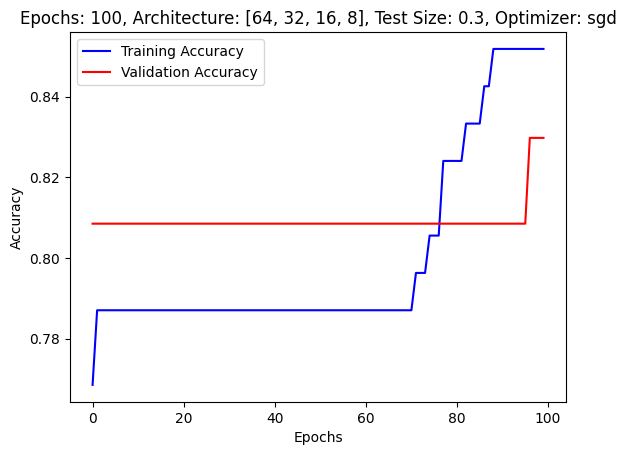

Epochs: 100, Architecture: [64, 32, 16, 8], Test Size: 0.3, Optimizer: sgd
Test Loss: 0.4095, Test Accuracy: 0.8298
Confusion Matrix:
[[38  0]
 [ 8  1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.90        38
           1       1.00      0.11      0.20         9

    accuracy                           0.83        47
   macro avg       0.91      0.56      0.55        47
weighted avg       0.86      0.83      0.77        47

1/1 [==============================] - 0s 68ms/step


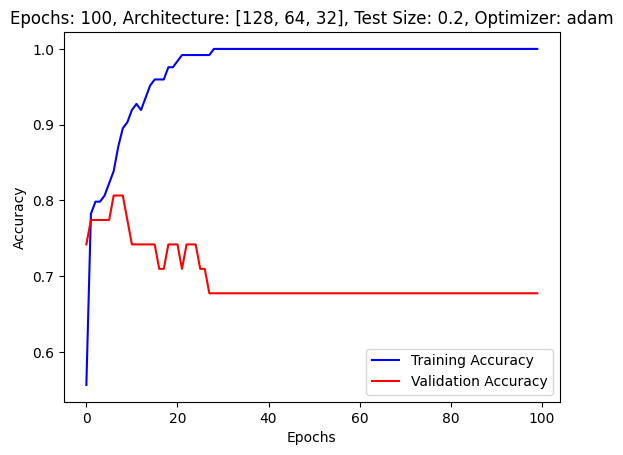

Epochs: 100, Architecture: [128, 64, 32], Test Size: 0.2, Optimizer: adam
Test Loss: 1.6997, Test Accuracy: 0.6774
Confusion Matrix:
[[19  5]
 [ 5  2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        24
           1       0.29      0.29      0.29         7

    accuracy                           0.68        31
   macro avg       0.54      0.54      0.54        31
weighted avg       0.68      0.68      0.68        31

1/1 [==============================] - 0s 119ms/step


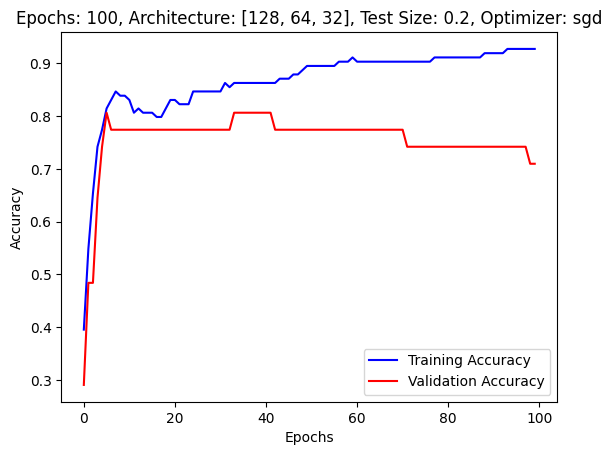

Epochs: 100, Architecture: [128, 64, 32], Test Size: 0.2, Optimizer: sgd
Test Loss: 0.5195, Test Accuracy: 0.7097
Confusion Matrix:
[[21  3]
 [ 6  1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        24
           1       0.25      0.14      0.18         7

    accuracy                           0.71        31
   macro avg       0.51      0.51      0.50        31
weighted avg       0.66      0.71      0.68        31

2/2 [==============================] - 0s 8ms/step


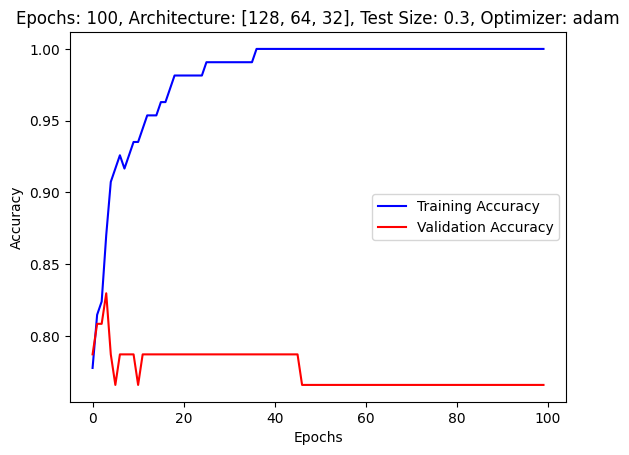

Epochs: 100, Architecture: [128, 64, 32], Test Size: 0.3, Optimizer: adam
Test Loss: 1.6557, Test Accuracy: 0.7660
Confusion Matrix:
[[33  5]
 [ 6  3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        38
           1       0.38      0.33      0.35         9

    accuracy                           0.77        47
   macro avg       0.61      0.60      0.61        47
weighted avg       0.76      0.77      0.76        47

2/2 [==============================] - 0s 6ms/step


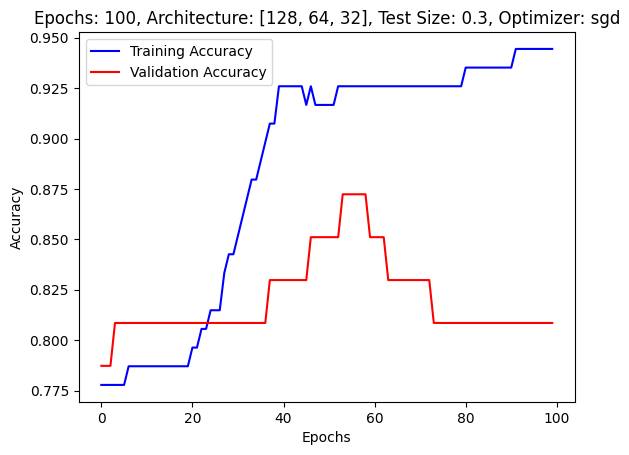

Epochs: 100, Architecture: [128, 64, 32], Test Size: 0.3, Optimizer: sgd
Test Loss: 0.3890, Test Accuracy: 0.8085
Confusion Matrix:
[[35  3]
 [ 6  3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89        38
           1       0.50      0.33      0.40         9

    accuracy                           0.81        47
   macro avg       0.68      0.63      0.64        47
weighted avg       0.79      0.81      0.79        47



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np



# Define lists of values to iterate over
epochs_list = [50,100]
architectures = [
    [64, 32, 16, 8],
    [128, 64, 32],

]
test_sizes = [0.2, 0.3]
optimizers = ['adam', 'sgd']

# Plotting variables
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Nested loops for hyperparameter tuning
for epochs in epochs_list:
    for architecture in architectures:
        for test_size in test_sizes:
            for optimizer in optimizers:
                # Split the data into training and testing sets
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

                # Standardize the input data (mean=0 and variance=1)
                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)

                # Build a customized neural network model
                model = Sequential()
                model.add(Dense(architecture[0], input_dim=18, activation='relu'))  # Input layer with 10 features

                for units in architecture[1:]:
                    model.add(Dense(units, activation='relu'))

                model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

                # Compile the model
                model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

                # Train the model and record training history for plotting
                history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=0)

                # Evaluate the model on the test set
                loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

                # Make predictions on the test set
                y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

                # Compute confusion matrix
                cm = confusion_matrix(y_test, y_pred)

                # Plot training and validation accuracy
                plt.plot(history.history['accuracy'], color='b', label='Training Accuracy')
                plt.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
                plt.title(f'Epochs: {epochs}, Architecture: {architecture}, Test Size: {test_size}, Optimizer: {optimizer}')
                plt.xlabel('Epochs')
                plt.ylabel('Accuracy')
                plt.legend()
                plt.show()

                # Print results
                print(f"Epochs: {epochs}, Architecture: {architecture}, Test Size: {test_size}, Optimizer: {optimizer}")
                print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
                print("Confusion Matrix:")
                print(cm)
                print("Classification Report:")
                print(classification_report(y_test, y_pred))
                print("=" * 50)